In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('test_data.csv')

In [3]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [5]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

In [6]:
df['Location'].value_counts()

United States of America    116
New York                     34
California                   19
San Jose                     19
Canada                       16
                           ... 
Halifax, N.S.                 1
State College, PA             1
Los ángeles , us              1
Stroudsburg Pa US             1
Trinidad and Tobago           1
Name: Location, Length: 1082, dtype: int64

In [7]:
df_cleaned = df.dropna(subset=['Location'])

In [8]:
df_cleaned.isnull().sum()

Review      6
date        0
Location    0
dtype: int64

In [9]:
df2 = df_cleaned.dropna(subset=['Review'])

In [10]:
df2.isnull().sum()

Review      0
date        0
Location    0
dtype: int64

In [12]:
# Filter rows containing positive feedback (you can customize the keywords)
positive_keywords = ["impressed", "great", "excellent", "friendly", "good"]
positive_reviews = df2[df2['Review'].str.contains('|'.join(positive_keywords), case=False, na=False)]

# Count the frequency of each positive keyword
keyword_counts = {}
for keyword in positive_keywords:
    keyword_counts[keyword] = positive_reviews['Review'].str.count(keyword).sum()

# Find the most common positive feedback keyword
most_common_positive_feedback = max(keyword_counts, key=keyword_counts.get)

print(f"The most common positive feedback keyword is: {most_common_positive_feedback}")


The most common positive feedback keyword is: great


In [13]:
# Filter rows containing negative feedback (customize the keywords)
negative_keywords = ["old", "small rooms", "poor service", "dirty", "unresponsive"]
negative_reviews = df2[df2['Review'].str.contains('|'.join(negative_keywords), case=False, na=False)]

# Count the frequency of each negative keyword
keyword_counts = {}
for keyword in negative_keywords:
    keyword_counts[keyword] = negative_reviews['Review'].str.count(keyword).sum()

# Find the most common negative feedback keyword
most_common_negative_feedback = max(keyword_counts, key=keyword_counts.get)

print(f"The most common negative feedback keyword is: {most_common_negative_feedback}")


The most common negative feedback keyword is: old


C:\Users\sinha\AppData\Local\Temp\ipykernel_47832\2809294366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'])


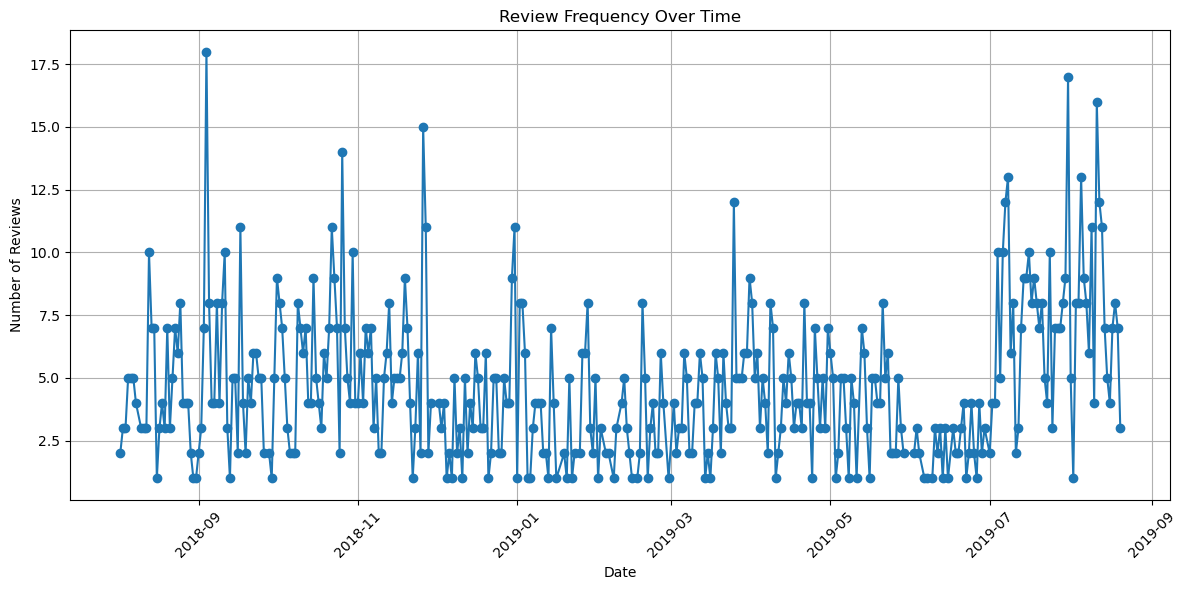

In [14]:
df2['date'] = pd.to_datetime(df2['date'])

# Group the data by the date and count the number of reviews for each date
review_count_by_date = df2.groupby('date').size()

# Create a time series chart
plt.figure(figsize=(12, 6))
plt.plot(review_count_by_date.index, review_count_by_date.values, marker='o', linestyle='-')
plt.title('Review Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()

In [15]:
location_ratings = df2.groupby('Location')['Review'].apply(lambda x: (x.str.count("impressed|great|excellent|friendly|good") - x.str.count("old|small rooms|poor service|dirty|unresponsive")).mean())

# Sort the locations by average rating in descending order
location_ratings = location_ratings.sort_values(ascending=False)

# Print the location-based ratings
print(location_ratings)

Location
Surrey UK            6.0
Chicago,Il           6.0
Uk Midlands.         5.0
Western Australia    5.0
Pensacola, us        4.0
                    ... 
Washington          -2.0
Coconut creek       -2.0
Short Hills, NJ     -2.0
Sacramento, CA      -3.0
Boston mass         -3.0
Name: Review, Length: 1078, dtype: float64


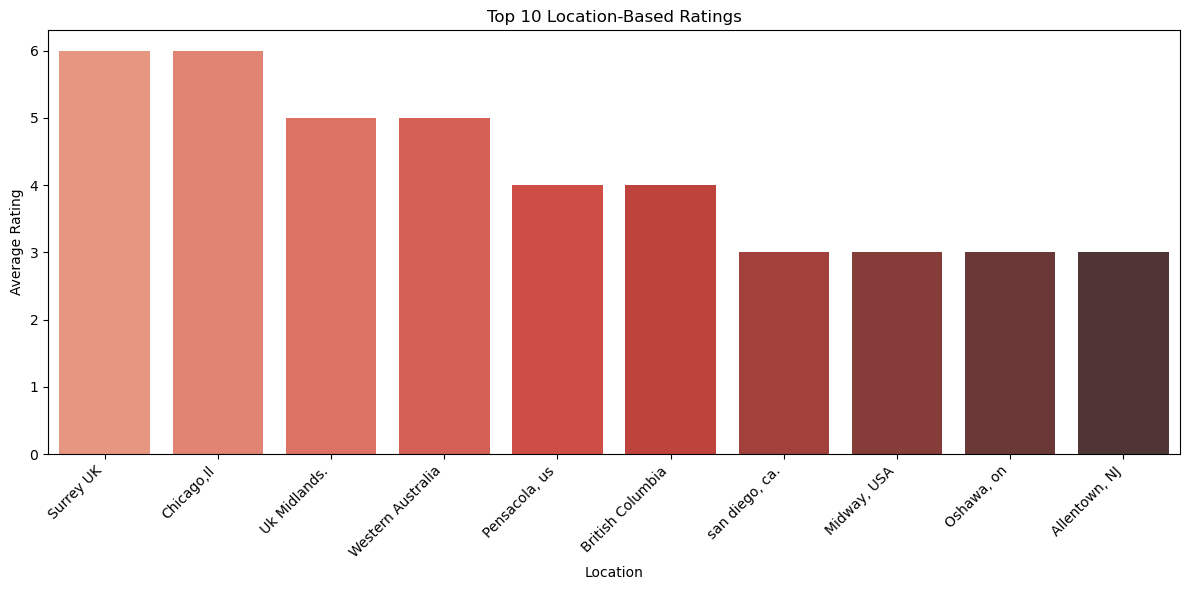

In [16]:
# Display the top 10 locations with the highest ratings
location_ratings = location_ratings[:10]

# Create a bar chart with rotated x-axis labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=location_ratings.index, y=location_ratings.values, palette="Reds_d")
plt.title('Top 10 Location-Based Ratings')
plt.xlabel('Location')
plt.ylabel('Average Rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate and adjust alignment
plt.tight_layout()

# Show the chart
plt.show()

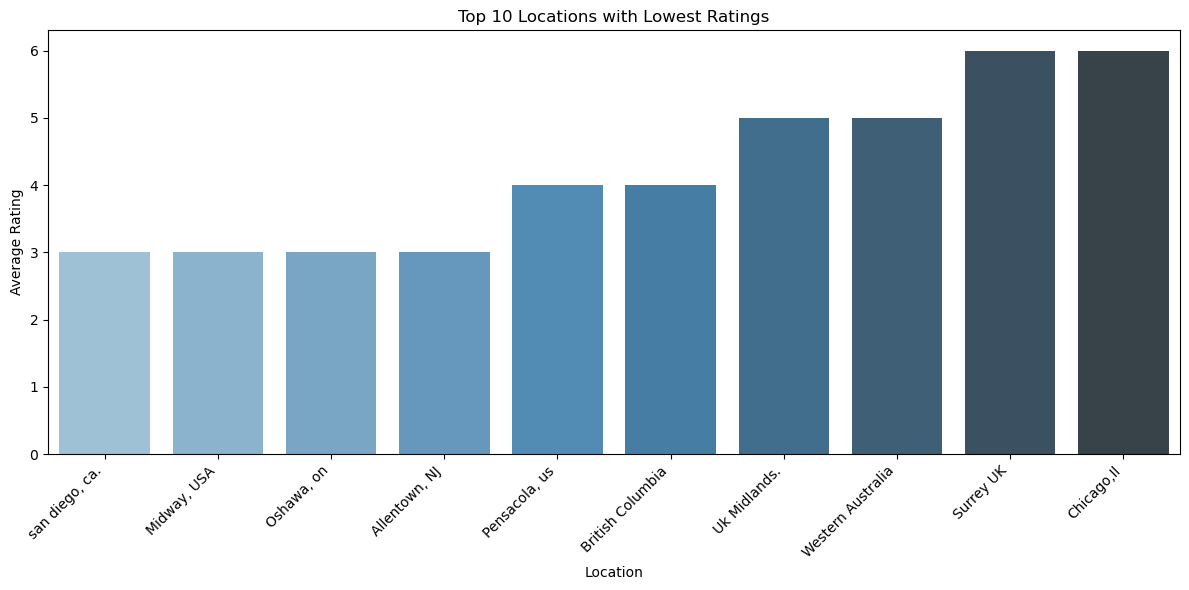

In [17]:
# Sort the locations by average rating in ascending order to get the lowest ratings
location_ratings = location_ratings.sort_values()

# Display the top 10 locations with the lowest ratings
top_10_lowest_ratings = location_ratings.head(10)

# Create a bar chart for the top 10 lowest-rated locations
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_lowest_ratings.index, y=top_10_lowest_ratings.values, palette="Blues_d")
plt.title('Top 10 Locations with Lowest Ratings')
plt.xlabel('Location')
plt.ylabel('Average Rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate and adjust alignment
plt.tight_layout()

# Show the chart
plt.show()